# tracking_app

## Load Data

In [34]:
%load_ext autoreload
%autoreload
%matplotlib inline
import gpxpy
import matplotlib.pyplot as plt
import datetime
#from geopy import distance
from math import sqrt, floor
import numpy as np
import pandas as pd
#import plotly.plotly as py
#import plotly.graph_objs as go
import haversine

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


#### https://towardsdatascience.com/how-tracking-apps-analyse-your-gps-data-a-hands-on-tutorial-in-python-756d4db6715d

## Data taken from Amazfit Stratos Watch

In [35]:
# Amazfit Stratos
gpx_file = open('./data/Zepp20200903214234.gpx', 'r')
gpx = gpxpy.parse(gpx_file)

print(gpx)

GPX(tracks=[GPXTrack(segments=[GPXTrackSegment(points=[...])])])


## Merge, Positions

In [36]:
## Merge, Positions

data = gpx.tracks[0].segments[0].points
#print('data:', data)

# Start Position
start = data[0]
print('start:', start)

# End Position
finish = data[-1]
print('finish', finish)

('start:', GPXTrackPoint(48.218727, 16.369995, elevation=-2000000.0, time=datetime.datetime(2020, 6, 30, 18, 7, 18)))
('finish', GPXTrackPoint(48.21856, 16.369694, elevation=20317.0, time=datetime.datetime(2020, 6, 30, 18, 52, 18)))


## Dataframe

In [37]:
df = pd.DataFrame(columns=['lon', 'lat', 'alt', 'time'])
for point in data:
    df = df.append({'lon': point.longitude, 'lat' : point.latitude, 
                    'alt' : point.elevation, 'time' : point.time}, 
                   ignore_index=True)

df.describe()

,lon,lat,alt
count,959.000000,959.000000,9.590000e+02
mean,16.376966,48.215726,-1.939016e+03
std,0.007475,0.003547,2.052139e+05
min,16.367687,48.211530,-2.000000e+06
25%,16.370398,48.212499,1.873300e+04
50%,16.374466,48.214176,1.958000e+04
75%,16.383677,48.218645,1.958900e+04
max,16.392632,48.223454,2.067500e+04


## Plots

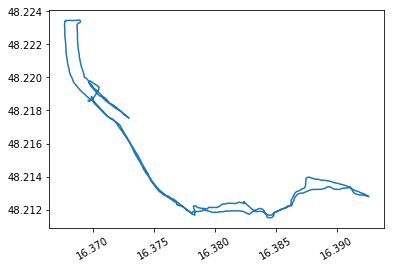

In [38]:
plt.xticks(rotation=30)
plt.plot(df['lon'], df['lat'])

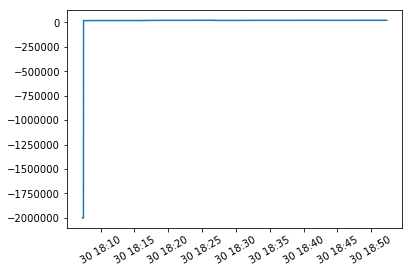

In [39]:
plt.xticks(rotation=30)
plt.plot(df['time'], df['alt'])

## Basemap

##### # http://www.datasciencemadesimple.com/get-maximum-value-column-python-pandas/

In [40]:
# Make edge for basemap
lon_lat_add = .01
lon_min = df['lon'].min() - lon_lat_add
lon_max = df['lon'].max() + lon_lat_add

lat_min = df['lat'].min() - lon_lat_add
lat_max = df['lat'].max() + lon_lat_add

http://server.arcgisonline.com/ArcGIS/rest/services/ESRI_Imagery_World_2D/MapServer/export?bbox=16.357687,48.20153,16.402632,48.233454&bboxSR=4269&imageSR=4269&size=1000,710&dpi=300&format=png32&transparent=true&f=image


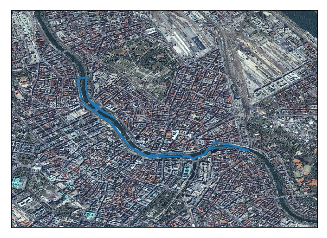

In [41]:
from mpl_toolkits.basemap import Basemap


m = Basemap(  
            llcrnrlon=lon_min, urcrnrlon=lon_max,    
            llcrnrlat=lat_min, urcrnrlat=lat_max,
            epsg=4269,    # Default
            ) 
m.arcgisimage(#service='World_Topo_Map',    # Straßenkarte grobskalig   
              #service='World_Terrain_Base',   # Does not work
              #service='Elevation/ESRI_Elevation_World',   # Does not work
              #service='ESRI_Imagery_World_2D',   
              xpixels = 1000,    # Default 1000, 100 bei World_Topo_Map  
              verbose= True,
              dpi=300
              )
m.plot(df['lon'], df['lat'])

## Comparing to Amazfit Stratos Watch

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

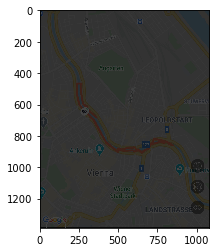

In [62]:
img = mpimg.imread('./data/IMG_20200903_230125.jpg')
imgplot = plt.imshow(img)

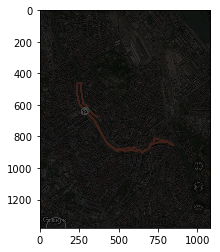

In [61]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
img = mpimg.imread('./data/IMG_20200903_230200.jpg')
imgplot = plt.imshow(img)